# <h1 style="font-family: Trebuchet MS; padding: 16px; font-size: 40px; color: #F99417; text-align: center; line-height: 1.25;"><b> Paywise: Linear Regression Salary Predictor<span style="color: #000000">  Ridge and Lasso Regression </span></b><br><span style="color: #F99417; font-size: 24px"> (0xnrous) </span></h1>

# **Introduction**

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">بسم الله الرحمن الرحيم</p>

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">السلام عليكم ورحمة الله وبركاته</p>

Hello fellow kagglers! My name is Mohamed Eisa, this is my public notebook Linear Regression Model ( Paywise: Linear Regression Salary Predictor) by Minmizing error score using Ridge and lasso Regression, please give me an upvote before you fork the notebook! and please, leave me your feedback, Hope you like it! 


*Sorry if my English is bad :') I hope you like it!*


**Github :**    https://github.com/0xnrous

**Linkedin :**  https://www.linkedin.com/in/mohamedeisa100/ 

**meduim :**    https://medium.com/@0xnrous 

feel free to Contact with me if u need help 

### About the Data 

> **The dataset consists of information about the 1986 and 1987 seasons of the US Major Baseball League**

> **Dataset Link: https://www.kaggle.com/datasets/mathchi/hitters-baseball-data**

> **This Notebook i make it to bulit Linear Regression models using Ridge and Lasso to minimize score of error (multicolinearity - Overfitting)**

# IMPORT LIBRARIES

In [1]:
import math 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="white", palette="BrBG")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
print ('setup-complete!')

setup-complete!


# LOAD DATA

In [2]:
data = pd.read_csv('Hitters.csv')
data_hitters = data.copy()

In [3]:
data_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data_hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
data_hitters.describe(include= 'all')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322,322,322.000000,322.000000,322.000000,263.000000,322
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,W,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,165,NaN,NaN,NaN,NaN,176
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,NaN,NaN,288.937888,106.913043,8.040373,535.925882,NaN
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,NaN,NaN,280.704614,136.854876,6.368359,451.118681,NaN
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,67.500000,NaN
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,NaN,NaN,109.250000,7.000000,3.000000,190.000000,NaN
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,NaN,NaN,212.000000,39.500000,6.000000,425.000000,NaN
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,NaN,NaN,325.000000,166.000000,11.000000,750.000000,NaN


## What Data Describe for Us : 
						
	AtBat	Number of times at bat in 1986.							
											
	Hits	Number of hits in 1986.							
											
	HmRun	Number of home runs in 1986.							
											
	Runs	Number of runs in 1986. 							
											
	RBI	Number of runs batted in in 1986.							
											
	Walks	Number of walks in 1986.							
											
	Years   Number of years in the major leagues.							
											
	CAtBat	Number of times at bat during their career.							
											
	CHits	Number of hits during their career.							
											
	CHmRun	Number of home runs during their career							
											
	CRuns	Number of runs during their career.							
											
	CRBI	Number of runs batted in during their career.							
											
	CWalks	Number of walks during their career.							
											
	League	Factor indicating player’s league at the end of 1986.	


	Division  Factor indicating player’s division at the end of 1986.							
					
	PutOuts	Number of put outs in 1986.							
											
	Assists	Number of assists in 1986.							
											
	Errors	Number of errors in 1986.							
											
	Salary	Annual salary on opening day in thousands (USD).							
											
	NewLeague   Factor indicating player’s league at the beginning of 1987.							
				
	AtBat	Number of times at bat in 1986.							
											
	Hits	Number of hits in 1986.							
											
	HmRun	Number of home runs in 1986.							
											
	Runs	Number of runs in 1986. 							
											
	RBI     Number of runs batted in in 1986.							
											
	Walks	Number of walks in 1986.							
											
	Years	Number of years in the major leagues.							
											
	CAtBat	Number of times at bat during their career.							
											
	CHits	Number of hits during their career.							
											
	CHmRun	Number of home runs during their career							
											
	CRuns	Number of runs during their career.							
											
	CRBI	Number of runs batted in during their career.							
											
	CWalks  Number of walks during their career.							
											
	League  Factor indicating player’s league at the end of 1986.							
						
	Division Factor indicating player’s division at the end of 1986.							
						
	PutOuts	Number of put outs in 1986.							
											
	Assists	Number of assists in 1986.							
											
	Errors	Number of errors in 1986.							
											
	Salary	Annual salary on opening day in thousands (USD).							
											
	NewLeague  Factor indicating player’s league at the beginning of 1987.							

                    A - American							
                    N - National		
                    W - West							
                    E - East					

# DATA PREPROCESSING

In [6]:
# Categorical Variable 
print ('League types are : ' , data_hitters['League'].unique())
print ("Division : " , data_hitters['Division'].unique())
print ("New League Options are : ", data_hitters['NewLeague'].unique())

League types are :  ['A' 'N']
Division :  ['E' 'W']
New League Options are :  ['A' 'N']


> **We need to converts this categorical variable into 0 and 1**

In [7]:
data_hitters_num  = pd.get_dummies(data_hitters , columns=['League', 'Division', 'NewLeague'], drop_first=True)
data_hitters_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


## Cheching Null Values 

In [8]:
data_hitters_num.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

> **Here we see that Salary have 59 null value (NAN): I deal with this by dropping NAN Values**

In [9]:
data_hitters_num_nonull = data_hitters_num.dropna()

In [10]:
data_hitters_num_nonull.sample(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
129,570,169,21,72,88,38,7,3754,1077,140,492,589,263,295,15,5,950.0,0,1,0
17,190,46,2,24,8,15,5,479,102,5,65,23,39,102,177,16,175.0,0,1,0


In [11]:
data_hitters_num_nonull.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

> Okay , here we go again it's our data is cleaned 

> Now our data good for training 

# Eploratory Data Analysis

## Plotting Data 

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


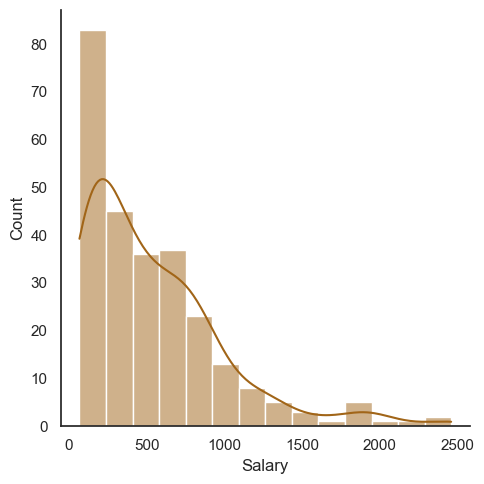

In [12]:
sns.displot(data_hitters_num_nonull['Salary']  , kde=True)

**It's Clear that most of the player pay is a number less than $1000$**

**The Most Common Value is $250$ , while salaries over $1500$ are rare (outliers)**  

**[outliers] : means these values are outside the expected range** 

## correlation Between Dependent and Independent Variables:

In [13]:
correlation = data_hitters_num_nonull.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

> **Okay, we can see that Variables with the strongest linear relationship to salary are specific baseball player gathered across the seasons ['CWalks', 'CHmRun', 'CAtBat' , 'CHits', 'CRuns', 'CRBI']** 


> **Almost half of our variables are weakly to target 'Salary' as ['Division_W', 'League_N','NewLeague_N', 'Errors' , 'Assists', 'PutOuts', 'HmRun', 'AtBat']**

> **I see our model will see some complexity to deal with these that don't  really improve it's performance [Feature Selection] will deal with this Features**

## Plot Multicolinearity

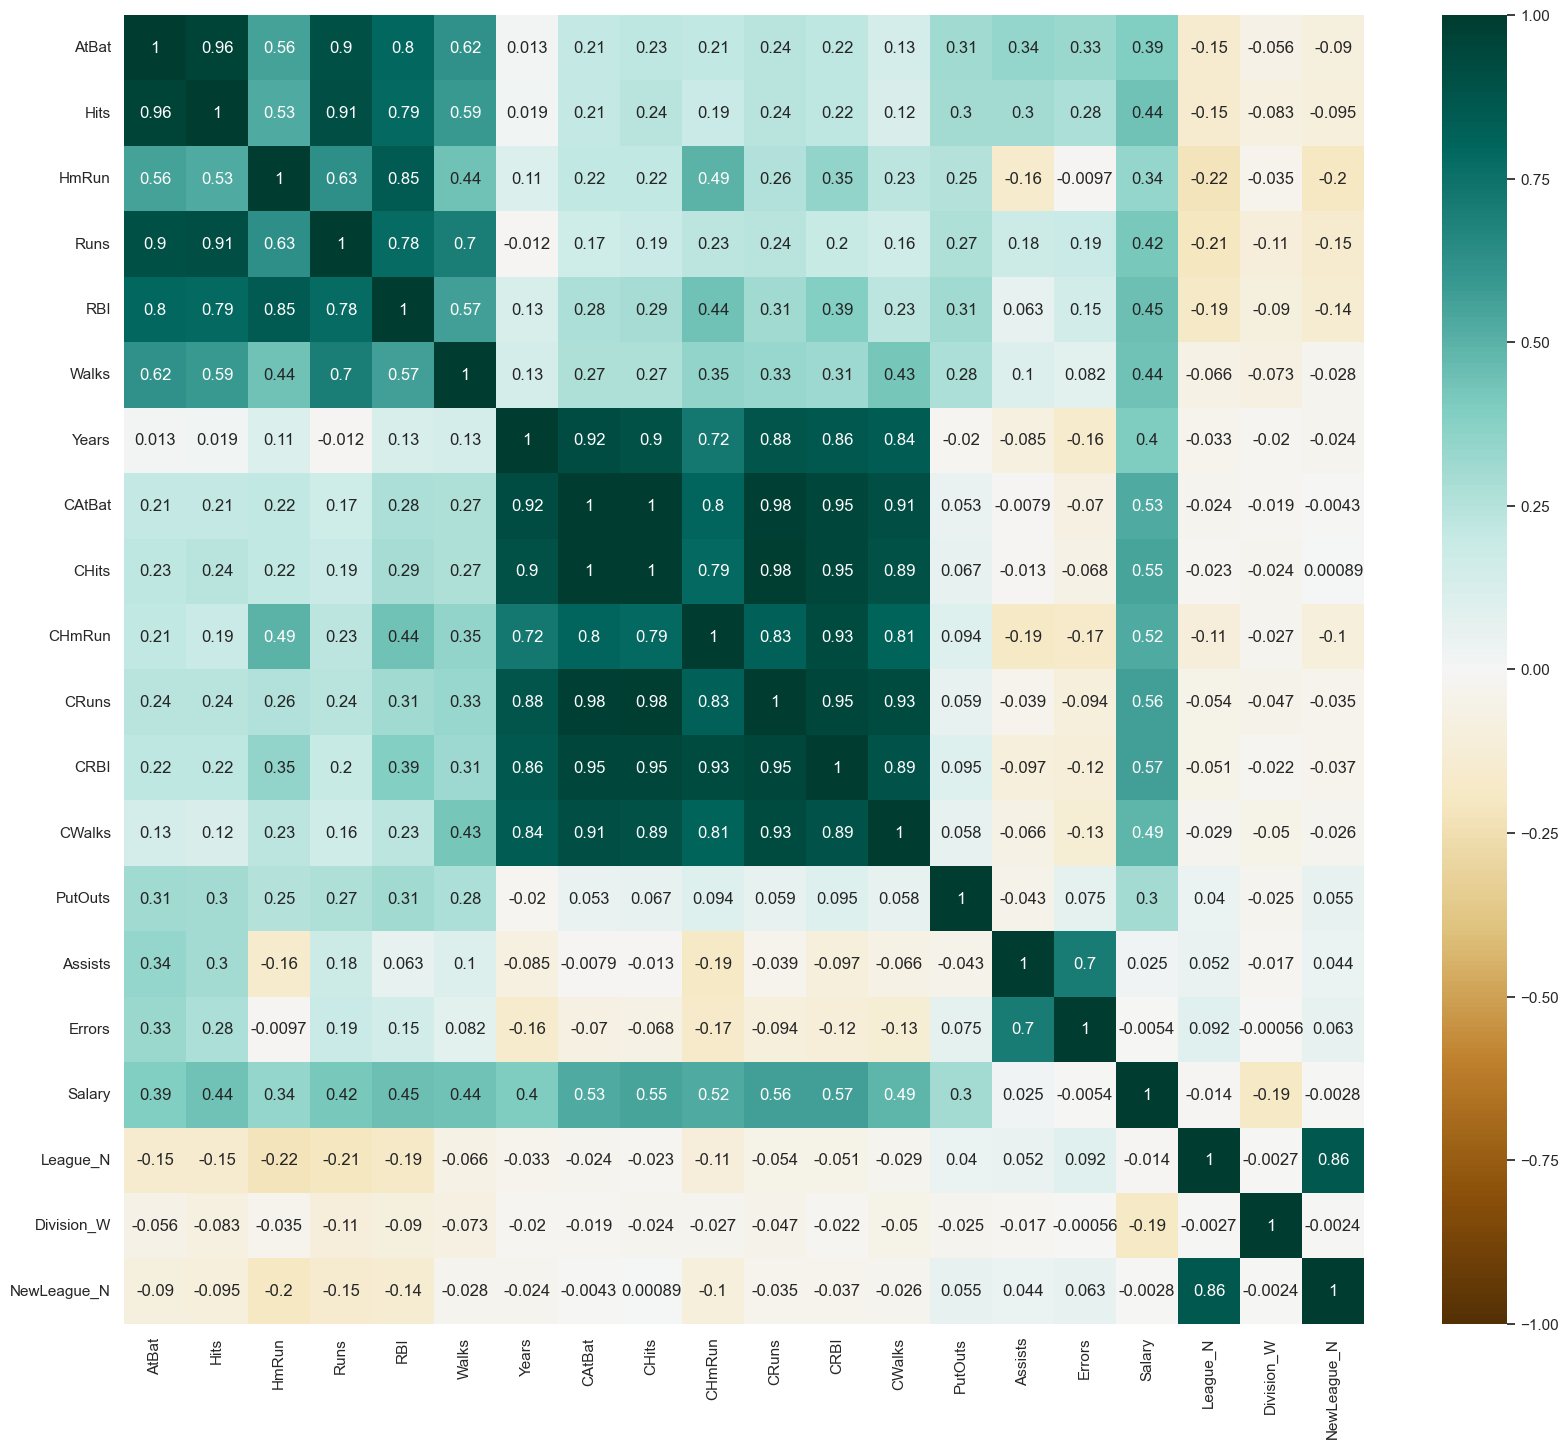

In [14]:
plt.figure(figsize=(20,17))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

> **I see strong correlation between features as number of runs ['CRuns'] and ['Years'] number of Years spents in the major leagues also ['CHmRuns'] Career home runs and  ['CHits'] Career Hits and so on** 

# LINEAR REGRESSION 

## Declare independent and dependent variables

In [15]:
X = data_hitters_num_nonull.drop('Salary', axis=1)
y = data_hitters_num_nonull['Salary']

### Splitting the dataset into the Training set and Test set


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=365)


### Scalling data 

In [17]:
# make instance of StandardScaler 
scaler = StandardScaler()
# fit and transform which rescales each input variable by substracting mean and dividing by standard deviation
# Mean = 0 , std = 1
x_train  = scaler.fit_transform(x_train)
# Apply scaled data to test set
x_test = scaler.transform(x_test)

### Perform Linear Regression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [19]:
# Let's See our coefficient and Intercept :
print ('Linear Regression coefficient are: ', lin_reg.coef_)
print ('Linear Regression Intercept is: ', lin_reg.intercept_)

Linear Regression coefficient are:  [-216.58725574  176.6665394    26.42174341  -32.30723397    3.50396442
  114.47871878  -38.27993316 -900.68020534  836.55817419   28.55520441
  405.6848943    64.99526588 -187.22476547  115.53995185   68.62131273
  -13.90111177   58.90973857  -81.77905186  -35.02755069]
Linear Regression Intercept is:  532.2961176470588


In [20]:
# make new variable y-pre to store the obtained predicated values for the testing set and the predict method will do rhe rest 
lin_reg_y_pred = lin_reg.predict(x_test) 
lin_reg_y_pred
# we get an numpy array containing the predication for the X_test subsets inputs values 

array([ 415.45782829,  432.20780272,  758.78349674,  799.00336712,
        350.20586478,  294.0659682 ,  184.24872446,  464.67402835,
       1108.05429466,  556.19984654,  488.06923001,  473.30471499,
        839.99519038,  751.59519044,  220.43742205,  320.16591592,
        340.14473675,  710.61012663,  170.8874789 ,  651.78620649,
        827.41281464,  196.71008612,  573.1185691 , 1172.76382687,
       1282.0883485 , 1594.28681356,  777.07655701, 1094.24965368,
        556.76207246, 1107.0708847 ,  477.61394579,  297.87571483,
        361.26177051,  503.18848321,  189.99424369,  241.50466799,
        248.98173212,  942.76631923,  617.30294655,  225.25956752,
        323.42092736,  455.93050456,  871.9585369 ,  379.23514877,
        620.49084963,  281.78622042,  566.78476943,  589.94187243,
        662.63913511,  545.01484672, 2012.42953081,  737.55139652,
        380.02427287,  443.3775693 , 1076.912394  ,  710.95238727,
        556.2946056 ,   68.23384264,  209.15575371,  195.57359

### Comparing Predicated Values with actual ones 

In [21]:
lin_compare = pd.DataFrame({'Predicated': lin_reg_y_pred , 'Actual': y_test})

In [22]:
lin_compare.sample(9)

,Predicated,Actual
187,543.731388,365.000
247,545.544298,560.000
183,411.946240,125.000
215,443.377569,175.000
120,1108.054295,733.333
84,911.322197,1900.000
162,100.658986,75.000
276,433.677483,155.000
303,422.501932,425.000


> **We see here some differences between actual and predicated values**

### Evaluation Linear Regression to Estimate performance: 

In [23]:
print('Linear Regression Model RMSE is: ' , math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print('Linear Regression Model Training Score: ', lin_reg.score(x_train , y_train)*100)
print('Linear Regression Model Testing Score: ', lin_reg.score(x_test,y_test)*100)

Linear Regression Model RMSE is:  313.2395678994061
Linear Regression Model Training Score:  56.80589160518967
Linear Regression Model Testing Score:  34.559948297363384


> **I see here RMSE is high value that mean there is a significant difference between actual and predicated values generated from our model**

> **Also Training score is 56% and Testing Score is much lower 34% , i think that multicollinearity issue might be fault here which i warned about at it before**

> **Alternativelty , Overfitting could also be the reason behind such a low testing score**

# Ridge Regression:

## Choose Tuning parameter

In [24]:
cv = RepeatedKFold(n_splits=5 , n_repeats= 3 , random_state= 1)

> **n_splits** / the number of folds we want to separate 

> **n_repeats**  / shows how many times the cv will repeat itself 

> **random_state** / shows the K-Fold split is performanced on the same parts of data

### Intializing Ridge Regressor 

In [25]:
ridge = RidgeCV(alphas= np.arange(0.1,10,0.1), cv = cv , scoring='neg_mean_absolute_error')
# scoring / measure based on which the cross validation process decides whether it performs better oe worse and confirms rejects the value of tuning parameter 
ridge

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
        scoring='neg_mean_absolute_error')

### Fitting Data

In [26]:
ridge.fit(x_train, y_train)
ridge_reg_y_pred = ridge.predict(x_test)
print ('Ridge Tuning Parameter: ' , (ridge.alpha_))
print ('Ridge Model Coefficients: ', (ridge.coef_))
print ('Ridge Model Intercept: ', (ridge.intercept_))

Ridge Tuning Parameter:  9.9
Ridge Model Coefficients:  [ -99.64056512   87.85475144   -3.70978058   22.50316688   18.34973213
   68.1928924   -55.21554926   -5.93096462  127.21511684   21.56457876
  129.7438877    93.22509485 -102.97057988  116.56925232   31.19052366
  -10.05599857   39.05110375  -80.7269112   -22.53792401]
Ridge Model Intercept:  532.2961176470588


In [27]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(x_train, y_train)*100)
print("Ridge Regression Model Testing Score: ",ridge.score(x_test, y_test)*100)

Ridge Regression Model RMSE is:  288.62308325272807
Ridge Regression Model Training Score:  52.78667721769688
Ridge Regression Model Testing Score:  44.44124247349731


> The Mean Square error of Ridge $288$ is Lower than simple Linear Regression 

> Testing score of Ridge Regression $44.4$ % is higher than simple Linear Regression 

# Lasso Regression:

### Intializing Lasso Regressor 

In [28]:
# we will make alphas with the same range for estimating the values during the cross validation process 
# cv equal to the repeated K fold cross validator we made it before 
# tol parameter represent the optimization tolerance (it tells the algorithm to stop searching once the tolerance between minimum and maximum achieved) tol =1 to prevent duality gap from accuring 
lasso = LassoCV(alphas= np.arange(0.1,10,0.1), cv=cv , tol = 1)
lasso

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1), tol=1)

### Fitting data

In [29]:
lasso.fit(x_train, y_train)
lasso_reg_y_pred = lasso.predict(x_test)
print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))

Lasso tuning parameter: 8.2
Lasso model coefficients: [ 55.51095192  45.97703489  27.53137446   3.3631333    9.03843356
  49.43671419 126.70293106  45.10058938  23.05442632   9.85632406
   0.           3.15689767  -8.11886084 102.94992196   0.
  -0.          17.76359236 -85.73614642  -0.        ]
Lassso model intercept: 532.2961176470588


> immmmmm Good the tuning parameter is valued at 8.2 a smaller merit than ridge regression 

> When we look to Coefficient here we see that some of it droped to zero 

In [30]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(x_train, y_train)*100)
print("Lasso Regression Model Testing Score: ",lasso.score(x_test, y_test)*100)

Lasso Regression Model RMSE is:  304.20725052657536
Lasso Regression Model Training Score:  44.82426197173428
Lasso Regression Model Testing Score:  38.279487562829416


> **First** /  the root mean square error score $304$ which is better that linear regression but still worse than Ridge Regression 

> **Second** / For the R-square results , they indicate the same tendancy with Linear Regression 

# Compare The Score 

In [31]:
print("Linear Regression Model Training Score: ",lin_reg.score(x_train, y_train)*100)
print("Linear Regression Model Testing Score: ",lin_reg.score(x_test, y_test)*100)
print("Ridge Regression Model Training Score: ",ridge.score(x_train, y_train)*100)
print("Ridge Regression Model Testing Score: ",ridge.score(x_test, y_test)*100)
print("Lasso Regression Model Training Score: ",lasso.score(x_train, y_train)*100)
print("Lasso Regression Model Testing Score: ",lasso.score(x_test, y_test)*100)

Linear Regression Model Training Score:  56.80589160518967
Linear Regression Model Testing Score:  34.559948297363384
Ridge Regression Model Training Score:  52.78667721769688
Ridge Regression Model Testing Score:  44.44124247349731
Lasso Regression Model Training Score:  44.82426197173428
Lasso Regression Model Testing Score:  38.279487562829416


> When we took a look to scores we see that the Linear Regression has highest score around $56$ % , But it failed to making predications verified by it's testing score only $34$ % (Data suffering from multicolinearity or Overfitting)


> When we see Ridge and lasso algorithms get lower scores in training but performed better in testing also we can see that the ridge regression slightly outperformed lasso according to scoring metric 

# Compare (RMSE)

In [32]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  313.2395678994061
Ridge Regression Model RMSE is:  288.62308325272807
Lasso Regression Model RMSE is:  304.20725052657536


> The average distance between predicated and actual values is shortest when applying Ridge Regression

`Final Overview Ridge and Lasso handle the data better than the Linear Regression`

# Replacing the missing values in the DataFrame

In [33]:
data_hitters_NAN = data_hitters_num[data_hitters_num['Salary'].isnull()]
data_hitters_NAN.sample(9)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
80,561,118,35,70,94,33,16,6677,1575,442,901,1210,608,463,32,8,NaN,0,1,0
144,209,45,0,38,19,42,10,3859,916,23,557,279,478,132,205,5,NaN,0,1,0
69,419,113,1,44,27,44,12,4484,1231,32,612,344,422,211,2,1,NaN,0,0,0
101,524,132,9,69,47,54,2,972,260,14,123,92,90,212,327,20,NaN,0,0,0
83,227,46,7,23,20,12,5,1325,324,44,156,158,67,92,2,2,NaN,0,1,0
103,395,106,16,48,56,35,10,2303,571,86,266,323,248,709,41,7,NaN,0,0,0
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN,1,1,1


## Splitting New Data to train and Test: 

In [34]:
x_NAN = data_hitters_NAN.drop('Salary', axis =1)
y_NAN = data_hitters_NAN['Salary']

## Scalling Data

In [35]:
scaler = StandardScaler()
x_NAN = scaler.fit_transform(x_NAN)

## Perform Ridge Regression 

In [36]:
NAN_pred = ridge.predict(x_NAN)
NAN_pred

array([ 392.78940486,   81.67108326, 1020.54279961,  328.05241123,
        731.7032967 , 1294.86708197,  348.80680508,  826.2803275 ,
        247.04429632,  626.11148259,  313.53020051,  597.22732684,
       1407.99142344,  151.18500308,  659.33642476,   32.76788545,
        410.44944613,  716.69211652,  444.57723576,  414.00770086,
        951.27012871,  164.51679   ,  397.85982369,  756.63559873,
        662.85289214,  756.35248229, 1077.31652353,  268.53058737,
        299.27045741, 1003.4839358 ,  519.45310223,  379.62948289,
        486.68102786,  197.10326024,  449.72180933,  580.29640809,
        176.44026221,  384.6652987 ,  384.67616694,  275.95941267,
        326.50223081,  601.57278994,  380.46502713,  543.86356167,
        392.18773833,  521.61830214,  510.15797952, 1153.97736734,
        879.25545633,  107.73887905,  148.10030637,  390.5113781 ,
        251.02876522,  239.78869032,  772.57321847,  301.89309692,
       1197.74498137, 1020.28080782,  447.86116108])

In [37]:
data_NAN_full = data_hitters_NAN.copy()
data_NAN_full['Salary'] = NAN_pred
data_NAN_full

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,392.789405,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,81.671083,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,1020.542800,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,328.052411,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,731.703297,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1294.867082,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,348.806805,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,826.280328,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,247.044296,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,626.111483,1,1,1


In [38]:
# Exporting data_NAN_full as csv file 
Full_Missing_data = data_NAN_full.to_csv('Full_Missing_data.csv')

# Conclusion:

## Insights

After conducting a detailed analysis of the dataset and implementing Ridge and Lasso regression, several key insights and observations have emerged:

1. **Strong Linear Relationships:**
   - It's evident that specific baseball player statistics gathered across seasons, including 'CWalks,' 'CHmRun,' 'CAtBat,' 'CHits,' 'CRuns,' and 'CRBI,' have the strongest linear relationship with the 'Salary' target variable.


2. **Weak Predictive Variables:**
   - Approximately half of the variables exhibit weak relationships with 'Salary.' These variables, such as 'Division_W,' 'League_N,' 'NewLeague_N,' 'Errors,' 'Assists,' 'PutOuts,' 'HmRun,' and 'AtBat,' contribute minimally to salary predictions.

3. **Complexity and Feature Selection:**
   - Some variables introduce complexity to the model without significantly improving performance. A careful feature selection process is essential to address this issue.

4. **High Correlation Between Features:**
   - Strong correlations were observed between certain features, such as 'CRuns,' 'Years' (number of years spent in the major leagues), 'CHmRuns' (career home runs), and 'CHits' (career hits), indicating multicollinearity in the data.

5. **Model Performance and RMSE:**
   - The difference between actual and predicted values is noticeable, as reflected in the high Root Mean Square Error (RMSE) score, indicating that the model has room for improvement.

6. **Training vs. Testing Scores:**
   - The model's training score (approximately 56%) significantly outperforms the testing score (approximately 34%), suggesting the presence of multicollinearity issues or overfitting.

7. **Ridge Regression:**
   - Ridge regression outperforms simple Linear Regression in terms of RMSE, and its testing score (44.4%) surpasses the testing score of Linear Regression. A smaller tuning parameter in Ridge regression further enhances its performance.

8. **Lasso Regression:**
   - Lasso regression exhibits a similar trend as Ridge regression but achieves slightly lower performance according to scoring metrics.

9. **Feature Elimination:**
   - Both Ridge and Lasso regression effectively reduce the coefficients of some features to zero, indicating their ability to handle multicollinearity and select the most relevant features.

**Final Overview:**
   - In summary, Ridge and Lasso regression models prove to be more effective in handling the dataset compared to Linear Regression. These models address multicollinearity, enhance predictive performance, and provide valuable insights into feature selection and model improvement.

These insights can guide further model refinement and feature engineering, ultimately leading to more accurate salary predictions.


                                                I hope  Ur enjoy with this notebook